In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
data_uber = pd.read_csv("UberDataset.csv", low_memory=False)

data_uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
data_uber.shape

(1156, 7)

In [4]:
print("The number of rows", data_uber.shape[0])
print("The number of columns", data_uber.shape[1])

The number of rows 1156
The number of columns 7


In [5]:
# Information about the dataset
data_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Pre-Processing 

In [7]:
# Filling NaN with Unknown
data_uber['PURPOSE'].fillna("Unknown", inplace=True)

C:\Users\PC34\AppData\Local\Temp\ipykernel_3484\2892251308.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_uber['PURPOSE'].fillna("Unknown", inplace=True)


In [8]:
data_uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
#  Ensure correct date format 
data_uber['START_DATE'] = pd.to_datetime(data_uber['START_DATE'], errors='coerce')

data_uber['END_DATE'] = pd.to_datetime(data_uber['END_DATE'], errors='coerce')

In [10]:
#Ensuring a correct date format 
data_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [11]:
from datetime import datetime

data_uber['Date'] = pd.DatetimeIndex(data_uber['START_DATE']).date
data_uber['Time'] = pd.DatetimeIndex(data_uber['START_DATE']).hour

In [12]:
data_uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [13]:
data_uber['DayPeriod'] = pd.cut(x=data_uber['Time'],bins = [0, 10, 15, 19, 24], labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

In [14]:
data_uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DayPeriod
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [15]:
# Checking the missing values in dataset

print("Missing value?", data_uber.isnull().values.any())

Missing value? True


In [16]:
data_uber.dropna(inplace=True)

In [17]:
data_uber.shape

(413, 10)

In [18]:
# Check for the Duplicate Data
data_uber.duplicated().any()

False

In [19]:
# Overall statistics of DataFrame of the dataset
data_uber.describe()

,START_DATE,END_DATE,MILES,Time
count,413,413,413.000000,413.000000
mean,2016-07-01 16:00:42.711864320,2016-07-01 16:20:05.230024192,9.120823,15.222760
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,1.000000
25%,2016-03-12 09:13:00,2016-03-12 09:22:00,2.700000,12.000000
50%,2016-07-04 18:23:00,2016-07-04 18:49:00,5.700000,16.000000
75%,2016-10-11 01:27:00,2016-10-11 02:08:00,9.900000,18.000000
max,2016-12-12 20:48:00,2016-12-12 20:57:00,174.200000,23.000000
std,NaN,NaN,16.517267,4.265322


# Data Visualization 

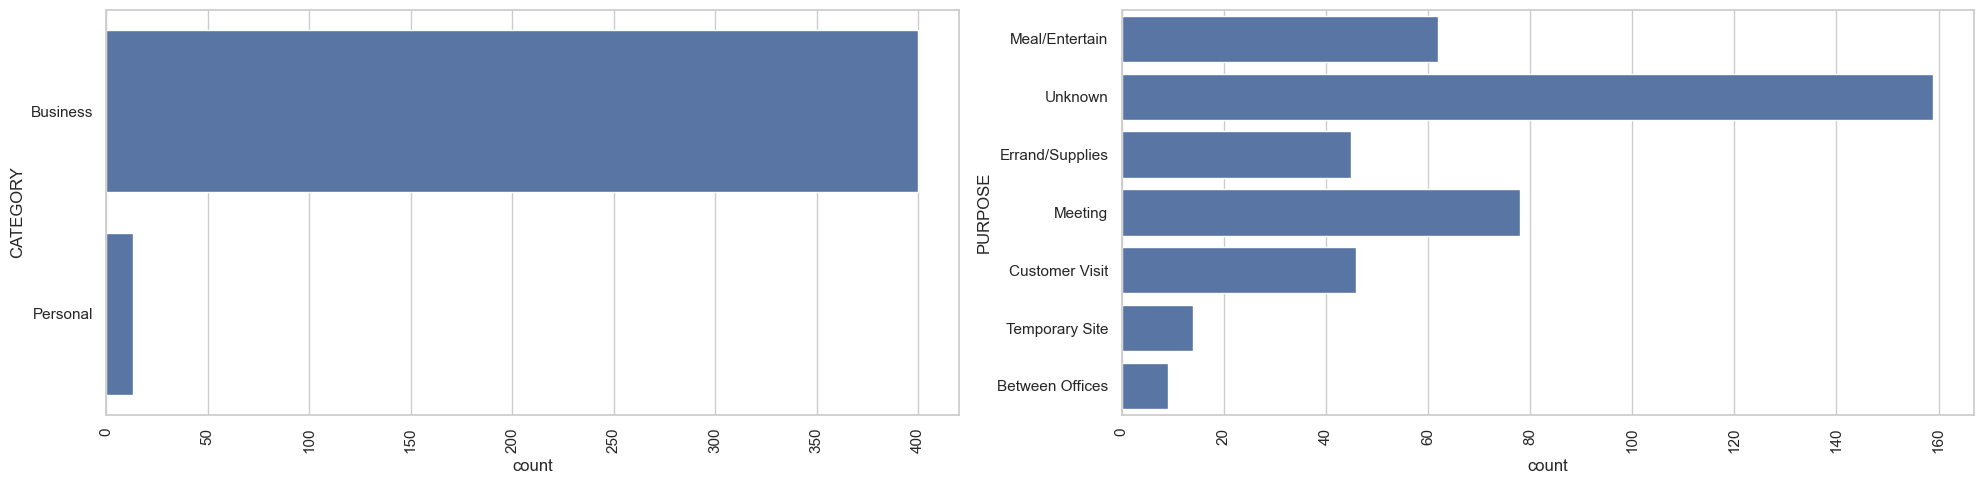

In [21]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

sns.countplot(data_uber['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data_uber['PURPOSE'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

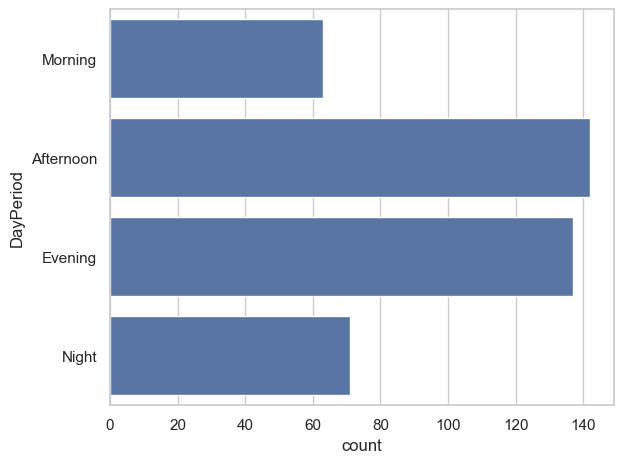

In [22]:
#3.At what time do people book cabs the most from uber?
sns.countplot(data_uber['DayPeriod'])
plt.tight_layout()
plt.show()

In [23]:
data_uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DayPeriod
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [24]:
# Extracting a Month from a  'START_DATE' in a column in a  DataFrame 'data_uber'
data_uber['MONTH'] = pd.DatetimeIndex(data_uber['START_DATE']).month

month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'March', 4.0: 'April', 5.0: 'May',
              6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sept', 10.0: 'Oct', 
              11.0: 'Nov', 12.0: 'Dec'}
data_uber['MONTH'] = data_uber['MONTH'].map(month_label)

mon = data_uber.MONTH.value_counts(sort=False)


In [25]:
data_uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DayPeriod,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


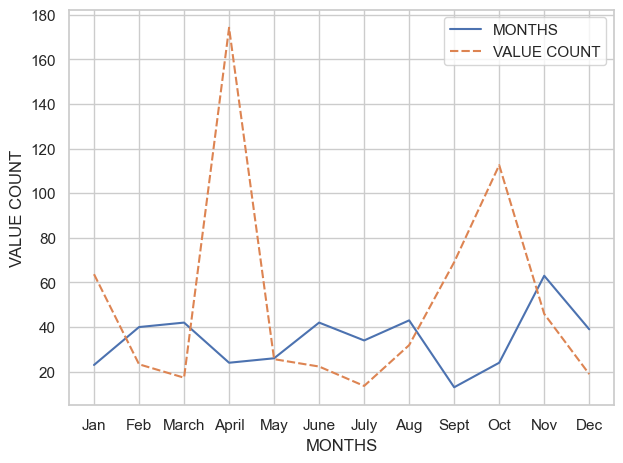

In [26]:
df = pd.DataFrame({
    "MONTHS": mon.values,
    "VALUE COUNT": data_uber.groupby('MONTH', sort=False)['MILES'].max()
})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")
plt.tight_layout()
plt.show()

In [27]:
data_uber['DAY'] = data_uber.START_DATE.dt.weekday 

day_label = {
    0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'
}

data_uber['DAY'] = data_uber['DAY'].map(day_label)

In [28]:
data_uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,DayPeriod,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


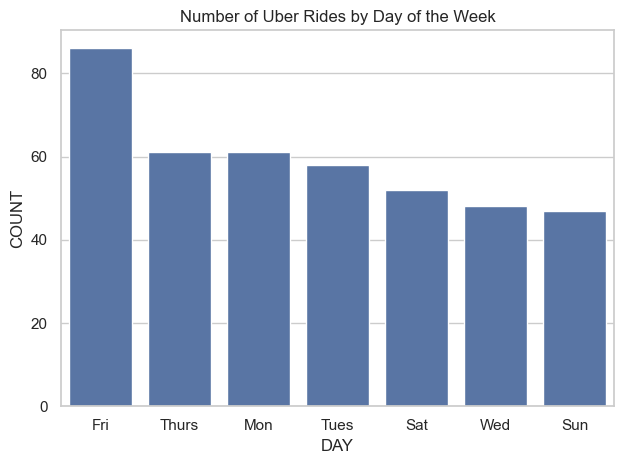

In [29]:
day_label = data_uber.DAY.value_counts()

sns.barplot(x=day_label.index, y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.title('Number of Uber Rides by Day of the Week')
plt.tight_layout()
plt.show()

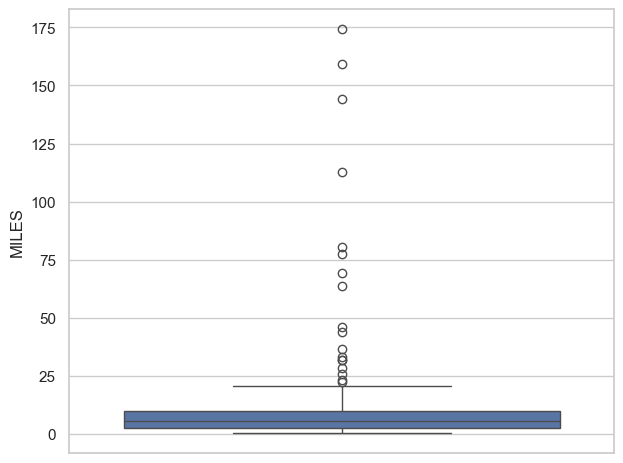

In [30]:
sns.boxplot(data_uber['MILES'])
plt.tight_layout()
plt.show()

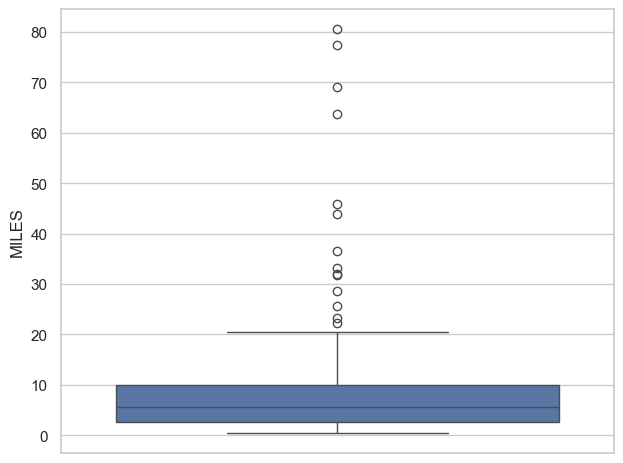

In [31]:
sns.boxplot(data_uber[data_uber['MILES']<100]['MILES'])
plt.tight_layout()
plt.show()

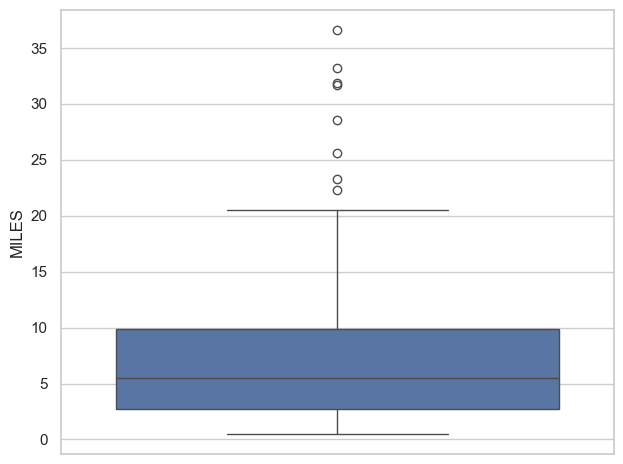

In [32]:
sns.boxplot(data_uber[data_uber['MILES']<40]['MILES'])
plt.tight_layout()
plt.show()

C:\Users\PC34\AppData\Local\Temp\ipykernel_3484\532789974.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_uber[data_uber['MILES']<40]['MILES'])


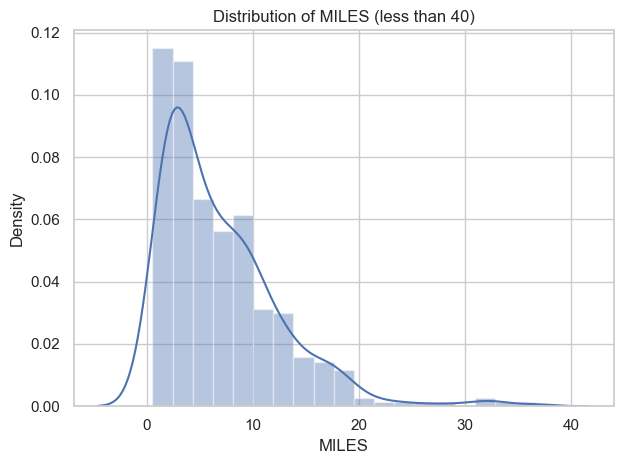

In [33]:
sns.distplot(data_uber[data_uber['MILES']<40]['MILES'])
plt.title('Distribution of MILES (less than 40)')
plt.tight_layout()
plt.show()

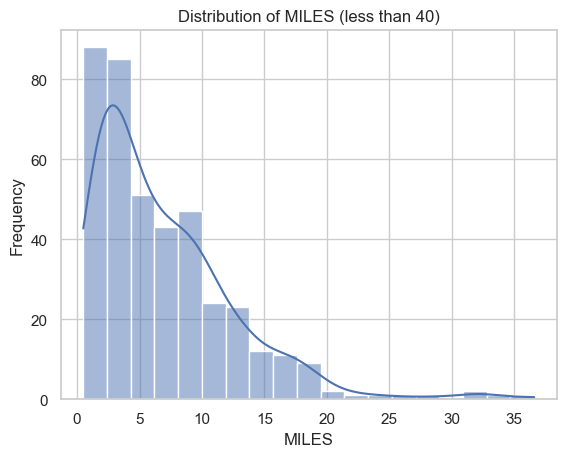

In [34]:
sns.histplot(data_uber[data_uber['MILES'] < 40]['MILES'], kde=True)
plt.xlabel('MILES')
plt.ylabel('Frequency')
plt.title('Distribution of MILES (less than 40)')
plt.show()
